### World Educational Data

👆 [Dataset on Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/world-educational-data)

_The original datased contained incorrect Latitude and Longitude values for some countries. I have corrected them in the dataset used in this notebook._


In [1]:
import pandas as pd

df = pd.read_csv("./global_education.csv")

In [2]:
df.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.0,65.0,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.0,20.0,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.0,3.0,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.5,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,-12.5,18.5,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

In [4]:
import matplotlib.pyplot as plt

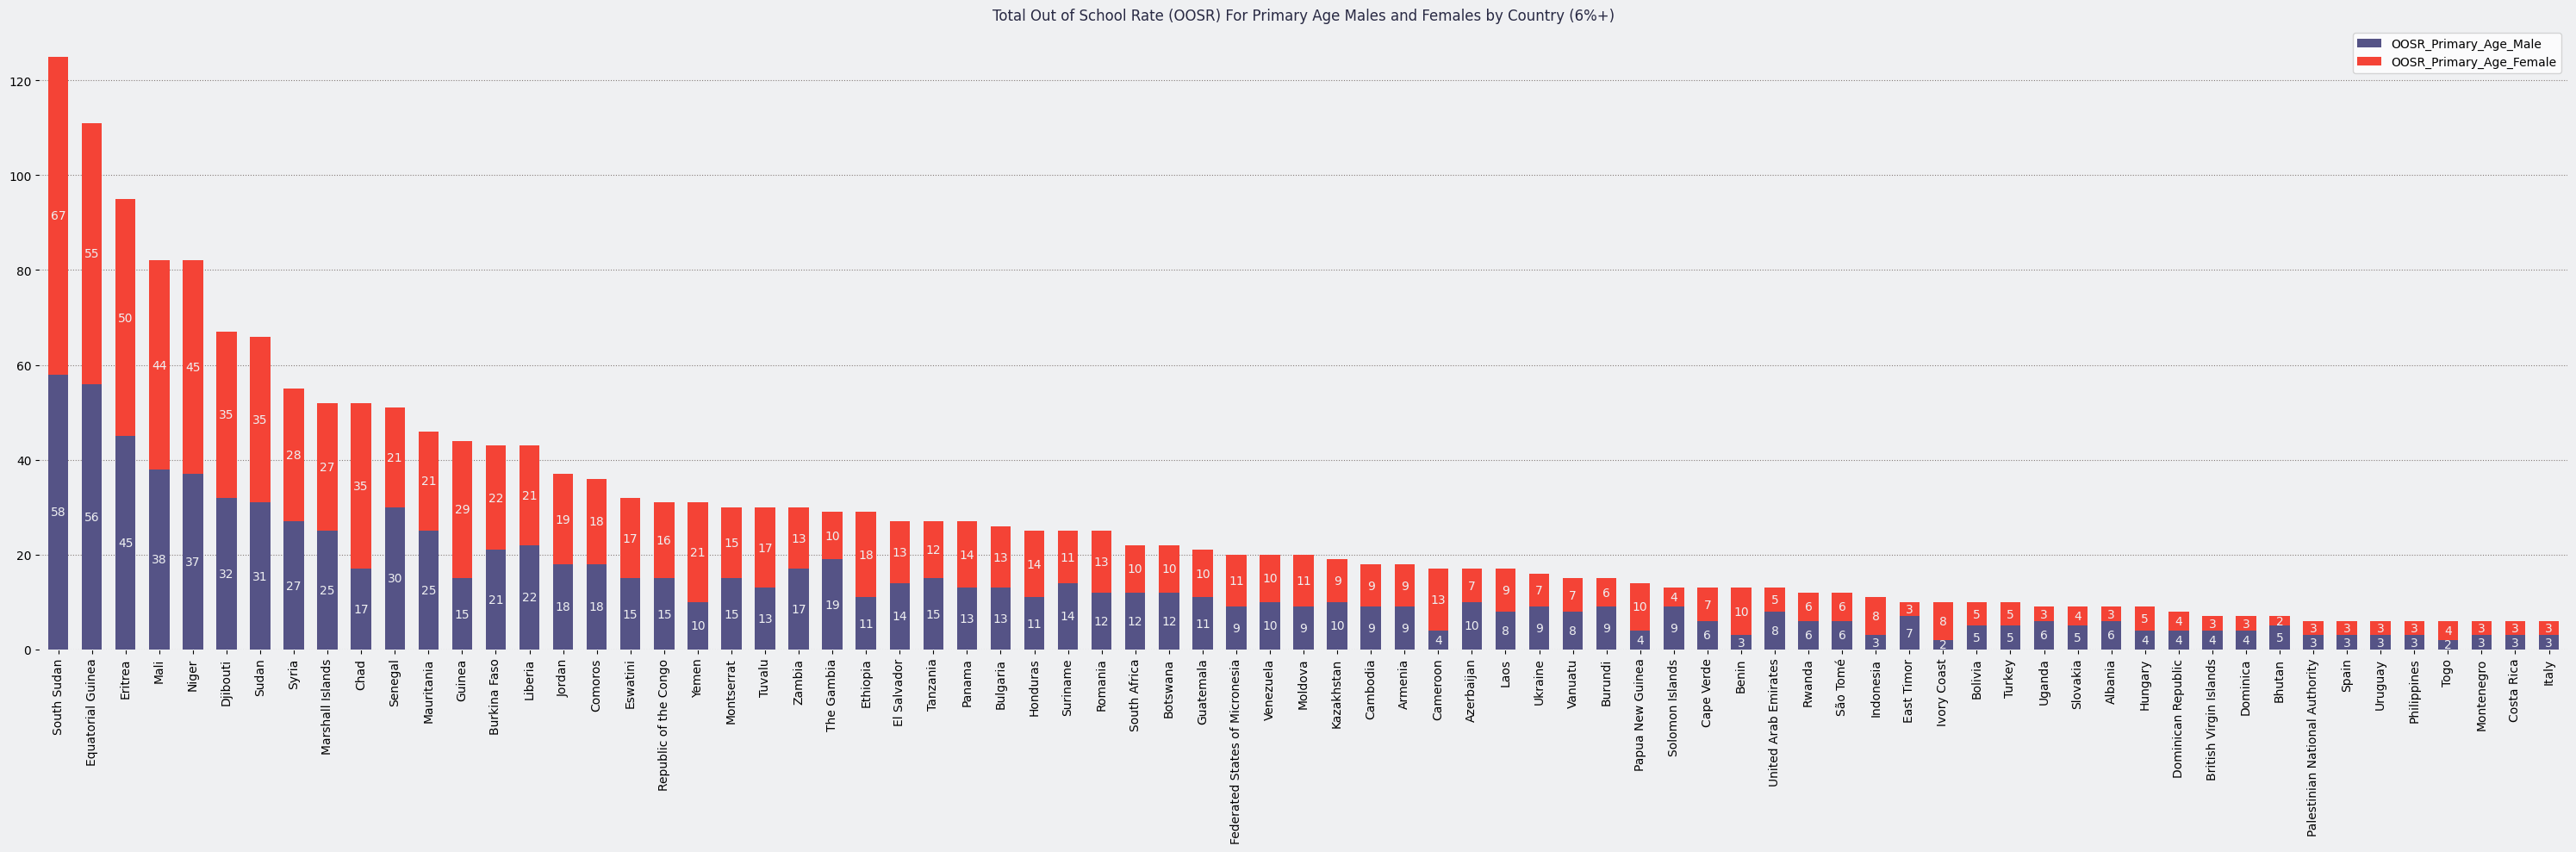

In [5]:
# Calculate the total out of school rate for primary age by summing male and female rates
df["Total_OOSR_Primary_Age"] = (
    df["OOSR_Primary_Age_Male"] + df["OOSR_Primary_Age_Female"]
)

# Grouping the DataFrame by country, calculating the sum of OOSR for male, female, and total,
# then sorting these sums in descending order based on the total OOSR
sorted_df = (
    df.groupby("Countries and areas")[
        [
            "OOSR_Primary_Age_Male",
            "OOSR_Primary_Age_Female",
            "Total_OOSR_Primary_Age",
        ]
    ]
    .sum()
    .sort_values(by="Total_OOSR_Primary_Age", ascending=False)
)

# Setting up the plot with a specified size and background color
plt.figure(figsize=(30, 10), facecolor="#EFF0F2")
ax = plt.gca()
ax.set_facecolor("#EFF0F2")

# Setting the edge color of the plot spines to match the background
for spine in ax.spines.values():
    spine.set_edgecolor("#EFF0F2")

# Plotting the data as a stacked bar chart, with different colors for male and female rates
sorted_df.head(75).plot(
    kind="bar",
    color=["#555386", "#F44336"],
    y=["OOSR_Primary_Age_Male", "OOSR_Primary_Age_Female"],
    stacked=True,
    ax=ax,
    width=0.6,
    zorder=3,
)

# Adding a title to the plot with custom styling
plt.title(
    "Total Out of School Rate (OOSR) For Primary Age Males and Females by Country (6%+)",
    color="#282943",
    fontsize=12,
)

# Adding a grid to the y-axis for better readability, with custom styling
plt.grid(axis="y", linestyle=":", zorder=0, color="#857C79")

# Adding data labels to each bar segment for clarity
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_y() + p.get_height() / 2,
        f"{int(p.get_height()):,}",
        ha="center",
        va="center",
        fontsize=10,
        color="#EFF0F2",
    )

# Removing the x-axis label for a cleaner look
plt.xlabel("")

# Setting the legend to automatically choose the best location
ax.legend(loc="best")

# Adjusting the layout to fit all elements neatly
plt.tight_layout()

# Saving the plot as an SVG file in the specified directory
plt.savefig("./output/Total_OOSR_Primary_Age_h.svg", format="svg")

# Displaying the plot
plt.show()

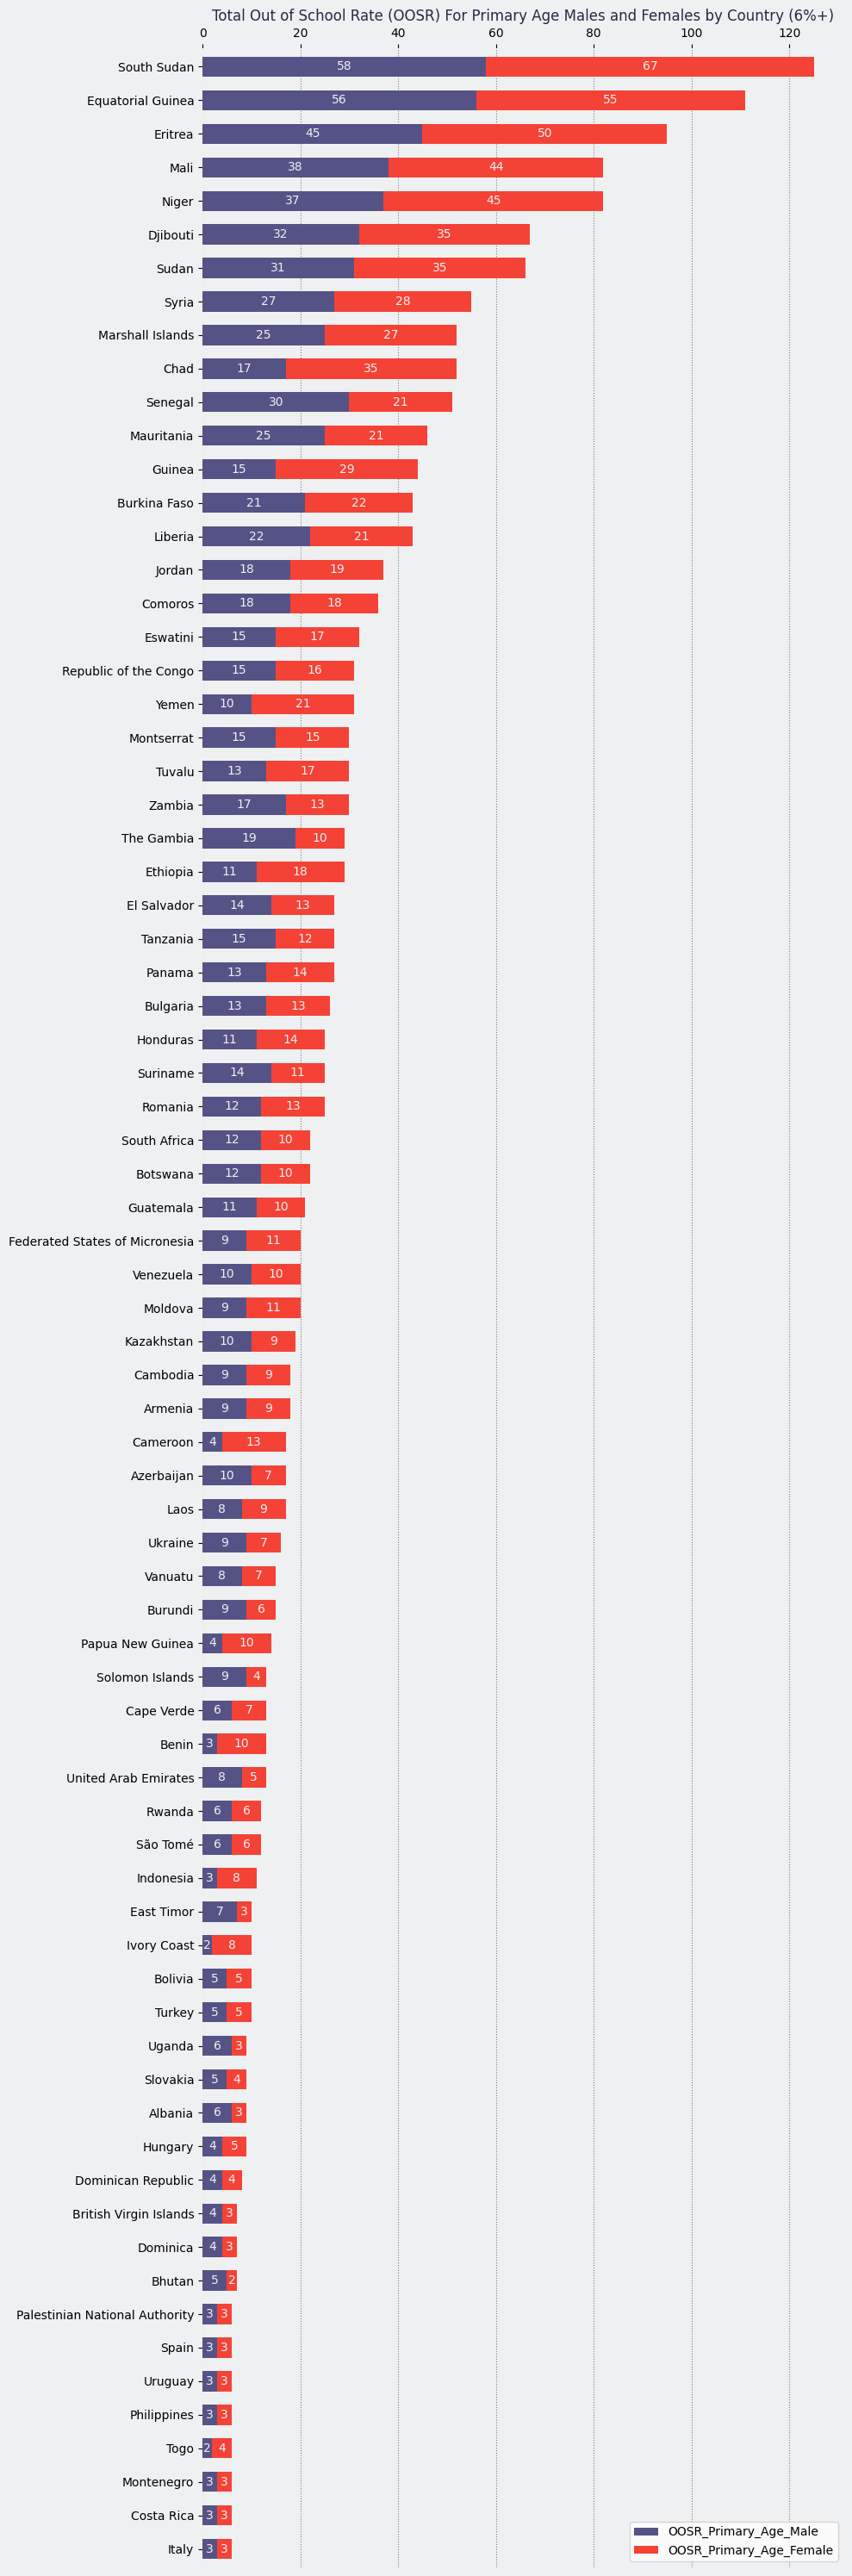

In [6]:
# Add a temporary column for sorting by the total out of school rate (OOSR)
# for primary age children, combining both male and female rates
df["Temp_Total_OOSR"] = df["OOSR_Primary_Age_Male"] + df["OOSR_Primary_Age_Female"]

# Grouping the DataFrame by countries, summing up the OOSR values for male, female, and the temporary total,
# then sorting these sums in descending order based on the temporary total OOSR
sorted_df = (
    df.groupby("Countries and areas")[
        ["OOSR_Primary_Age_Male", "OOSR_Primary_Age_Female", "Temp_Total_OOSR"]
    ]
    .sum()
    .sort_values(by="Temp_Total_OOSR", ascending=False)
)

# Dropping the temporary column used for sorting before plotting
sorted_df.drop("Temp_Total_OOSR", axis=1, inplace=True)

# Selecting the top 75 entries and reversing their order to plot the highest values at the top
sorted_df = sorted_df.head(75).iloc[::-1]

# Setting up the plot with a specified size and background color
plt.figure(figsize=(10, 30), facecolor="#EFF0F2")
ax = plt.gca()
ax.set_facecolor("#EFF0F2")

# Customizing the plot spines to match the background color
for spine in ax.spines.values():
    spine.set_edgecolor("#EFF0F2")

# Moving the x-axis to the top for a clearer visualization in a horizontal bar chart
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

# Plotting the data as a horizontal stacked bar chart with custom colors for male and female rates
sorted_df.plot(
    kind="barh",
    color=["#555386", "#F44336"],
    stacked=True,
    ax=ax,
    width=0.6,
    zorder=3,
)

# Adding a title to the plot with custom styling
plt.title(
    "Total Out of School Rate (OOSR) For Primary Age Males and Females by Country (6%+)",
    color="#282943",
    fontsize=12,
)
plt.grid(axis="x", linestyle=":", zorder=0, color="#857C79")

# Adding data labels to each bar segment for easy reading of values
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_y() + p.get_height() / 2,
        f"{int(p.get_width()):,}",
        ha="center",
        va="center",
        fontsize=10,
        color="#EFF0F2",
    )

plt.ylabel("")

# Automatically positioning the legend in the best location
ax.legend(loc="best")

# Adjusting the layout for a neat and tight fit of all plot elements
plt.tight_layout()

# Saving the plot as an SVG file in the specified directory
plt.savefig("./output/Total_OOSR_Primary_Age_v.svg", format="svg")

# Displaying the plot
plt.show()

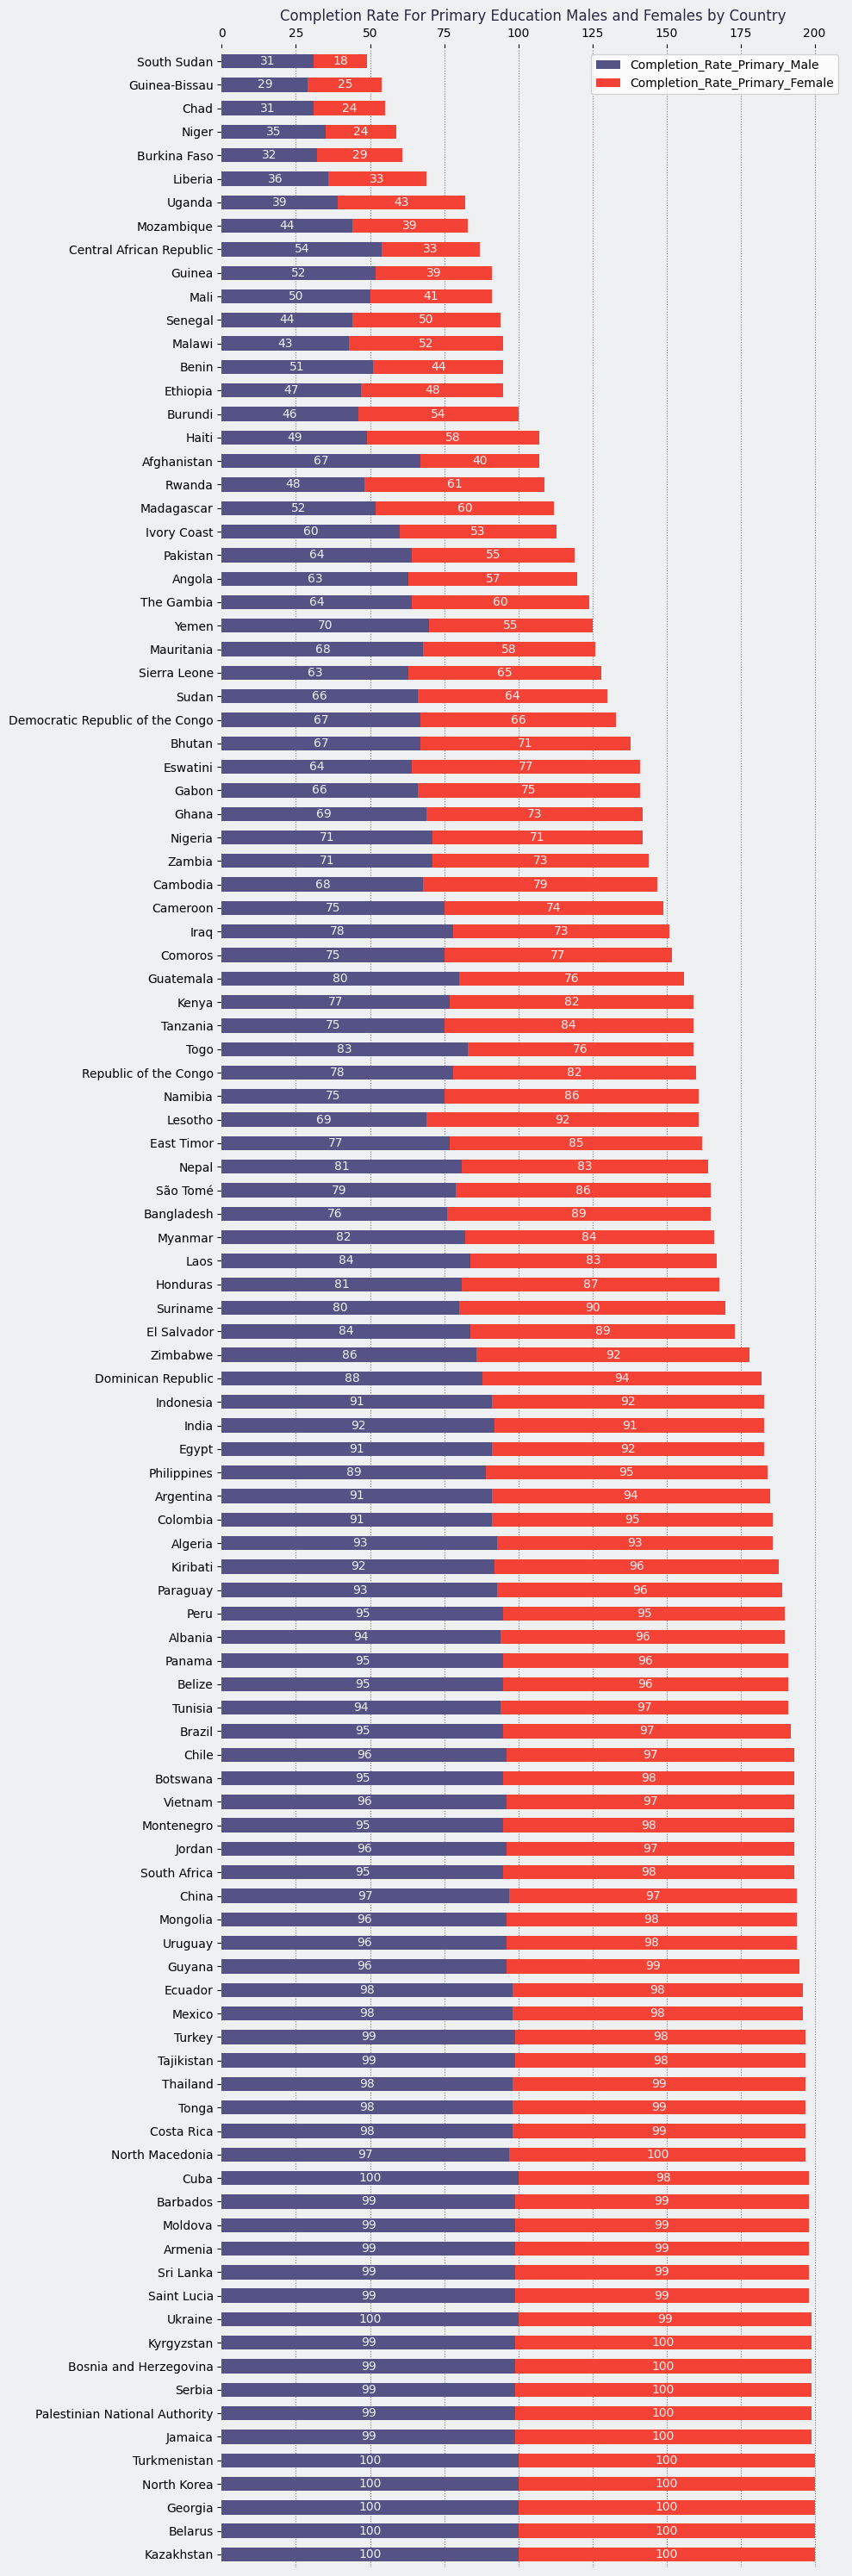

In [26]:
# Create a copy of the filtered DataFrame to avoid SettingWithCopyWarning
filtered_df = df.query(
    "Completion_Rate_Primary_Male != 0 and Completion_Rate_Primary_Female != 0"
).copy()

# Add the temporary column for sorting
filtered_df["Temp_Total_Completion_Rate_Primary"] = (
    filtered_df["Completion_Rate_Primary_Male"]
    + filtered_df["Completion_Rate_Primary_Female"]
)

# Continue with grouping and plotting as before...


# Grouping the filtered DataFrame
sorted_df = (
    filtered_df.groupby("Countries and areas")[
        [
            "Completion_Rate_Primary_Male",
            "Completion_Rate_Primary_Female",
            "Temp_Total_Completion_Rate_Primary",
        ]
    ]
    .sum()
    .sort_values(by="Temp_Total_Completion_Rate_Primary", ascending=True)
)


# Dropping the temporary column used for sorting before plotting
sorted_df.drop("Temp_Total_Completion_Rate_Primary", axis=1, inplace=True)

# Selecting the top 75 entries and reversing their order to plot the highest values at the top
sorted_df = sorted_df.iloc[::-1]

# Setting up the plot with a specified size and background color
plt.figure(figsize=(10, 30), facecolor="#EFF0F2")
ax = plt.gca()
ax.set_facecolor("#EFF0F2")

# Customizing the plot spines to match the background color
for spine in ax.spines.values():
    spine.set_edgecolor("#EFF0F2")

# Moving the x-axis to the top for a clearer visualization in a horizontal bar chart
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

# Plotting the data as a horizontal stacked bar chart with custom colors for male and female rates
sorted_df.plot(
    kind="barh",
    color=["#555386", "#F44336"],
    stacked=True,
    ax=ax,
    width=0.6,
    zorder=3,
)

# Adding a title to the plot with custom styling
plt.title(
    "Completion Rate For Primary Education Males and Females by Country",
    color="#282943",
    fontsize=12,
)
plt.grid(axis="x", linestyle=":", zorder=0, color="#857C79")

# Adding data labels to each bar segment for easy reading of values
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_y() + p.get_height() / 2,
        f"{int(p.get_width()):,}",
        ha="center",
        va="center",
        fontsize=10,
        color="#EFF0F2",
    )

plt.ylabel("")

# Automatically positioning the legend in the best location
ax.legend(loc="best")

# Adjusting the layout for a neat and tight fit of all plot elements
plt.tight_layout()

# Saving the plot as an SVG file in the specified directory
plt.savefig("./output/Total_Completion_Rate_Primary_v.svg", format="svg")

# Displaying the plot
plt.show()